No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


len: 490
{(413, 438): 0, (419, 487): 0, (417, 487): 1, (414, 487): 0, (419, 483): 0, (417, 478): 2, (612, 476): 0, (601, 503): 0, (715, 568): 1, (415, 518): 0, (609, 478): 0, (396, 521): 0, (417, 498): 0, (417, 510): 0, (413, 522): 0, (421, 567): 0, (406, 491): 0, (420, 481): 0, (412, 474): 2, (401, 491): 0, (415, 468): 2, (413, 473): 1, (415, 453): 0, (409, 299): 0, (412, 550): 0, (407, 515): 1, (407, 473): 0, (411, 480): 1, (598, 508): 0, (404, 479): 0, (450, 313): 0, (406, 497): 0, (417, 467): 0, (412, 478): 1, (408, 552): 0, (416, 478): 1, (410, 479): 0, (415, 485): 0, (412, 527): 1, (717, 528): 0, (414, 567): 0, (605, 486): 0, (416, 553): 0, (415, 497): 0, (410, 481): 2, (399, 473): 0, (417, 492): 0, (410, 477): 1, (415, 567): 1, (408, 559): 0, (417, 495): 0, (683, 513): 0, (606, 451): 0, (407, 479): 0, (424, 492): 0, (605, 462): 0, (415, 477): 2, (419, 553): 0, (408, 527): 0, (407, 493): 0, (424, 506): 0, (415, 515): 0, (599, 472): 0, (411, 481): 0, (413, 474): 1, (414, 478): 0, 

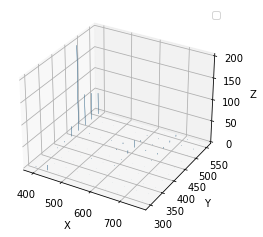

In [8]:
import os
import torch

gpus = "2,7"
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = gpus

if __name__ == "__main__":
    
    
    """devices = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print("Device: %s: %s" % (devices, str(gpus)))

    torch.rand((10,10)).to(devices)
    torch.rand((10,10)).to(devices)
    print(os.path.abspath(__file__))
    print(os.path.dirname( os.path.abspath(__file__) ))

    for i in range(10):
        torch.rand((10,10)).to(devices)"""

    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np

    _dir = '/data1/sdi/datasets/CPN_all'

    images = [os.path.join(_dir, 'Images', x) for x in os.listdir(os.path.join(_dir, 'Images'))]
    masks = [os.path.join(_dir, 'Masks', x) for x in os.listdir(os.path.join(_dir, 'Masks'))]

    print(f'len: {len(images)}')

    X, Y = [], []
    shape = {}

    for im in images:
        x = Image.open(im).convert('L')
        x1, x2 = x.size
        if x.size not in shape.keys():
            shape[x.size] = 0
        else:
            shape[x.size] += 1
        X.append(x1)
        Y.append(x2)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    hist, xedges, yedges = np.histogram2d(X, Y)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # Construct arrays for the anchor positions of the 16 bars.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
    xpos = xpos.ravel()
    ypos = ypos.ravel()
    zpos = 0

    # Construct arrays with the dimensions for the 16 bars.
    dx = dy = 0.5 * np.ones_like(zpos)
    dz = hist.ravel()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
    plt.legend()
    plt.show()


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

_dir = '/data1/sdi/datasets/CPN_all'

images = [os.path.join(_dir, 'Images', x) for x in os.listdir(os.path.join(_dir, 'Images'))]
masks = [os.path.join(_dir, 'Masks', x) for x in os.listdir(os.path.join(_dir, 'Masks'))]

print(f'len: {len(images)}')

X, Y = [], []

h_min, h_max, w_min, w_max = [], [], [], []
upper, lower = [], []
h_mid, w_mid = [], []
for ma in masks:
    m = Image.open(ma).convert('L') # H x W
    h,w = np.where(np.array(m) > 0)
    h_min.append(h.min())
    h_max.append(h.max())
    w_min.append(w.min())
    w_max.append(w.max())
    upper.append(h.min() + w.min())
    lower.append(h.max() + w.max())
    h_mid.append(h.min() + h.max())
    w_mid.append(w.min() + w.max())
h_min = np.array(h_min)
h_max = np.array(h_max)
w_min = np.array(w_min)
w_max = np.array(w_max)
h_mid = np.array(h_mid) / 2
w_mid = np.array(w_mid) / 2
print(f'h_min mean: {h_min.mean():.4f}/{h_min.std():.4f}, min/max: {h_min.min()}/{h_min.max()}')
print(f'h_max mean: {h_max.mean():.4f}/{h_max.std():.4f}, min/max: {h_max.min()}/{h_max.max()}')
print(f'w_min mean: {w_min.mean():.4f}/{w_min.std():.4f}, min/max: {w_min.min()}/{w_min.max()}')
print(f'w_max mean: {w_max.mean():.4f}/{w_max.std():.4f}, min/max: {w_max.min()}/{w_max.max()}')
print(f'w_mid mean: {w_mid.mean():.4f}/{w_mid.std():.4f}, min/max: {w_mid.min()}/{w_mid.max()}')
print(f'h_mid mean: {h_mid.mean():.4f}/{h_mid.std():.4f}, min/max: {h_mid.min()}/{h_mid.max()}')

len: 490
h_min mean: 83.5837/37.1330, min/max: 14/237
h_max mean: 134.4469/45.7486, min/max: 43/339
w_min mean: 150.8102/62.2691, min/max: 11/459
w_max mean: 291.2694/66.1008, min/max: 144/573
w_mid mean: 221.0398/60.1641, min/max: 83.5/516.0
h_mid mean: 109.0153/40.6166, min/max: 29.0/288.0


In [153]:
xy = np.zeros((160, 160), )
BLOCK = 5

for i in range(len(h_min)):
    idx = round(h_min[i] / BLOCK)
    idy = round(w_min[i] / BLOCK)
    xy[idx, idy] += 1

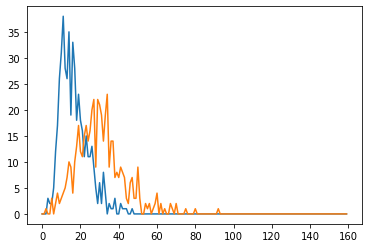

In [130]:
x = [0 for i in range(160)]
y = [0 for i in range(160)]
z = [0 for i in range(160)]
w = [0 for i in range(160)]
BLOCK = 5

assert( len(h_min) == len(h_max) == len(w_min) == len(w_max) )

for i in range(len(h_min)):
    idx = round(h_min[i] / BLOCK)
    idy = round(h_max[i] / BLOCK)
    idz = round(w_min[i] / BLOCK)
    idw = round(w_max[i] / BLOCK)
    x[idx] += 1
    y[idy] += 1
    z[idz] += 1
    w[idw] += 1

plt.plot(x)
#plt.plot(y)
plt.plot(z)
#plt.plot(w)


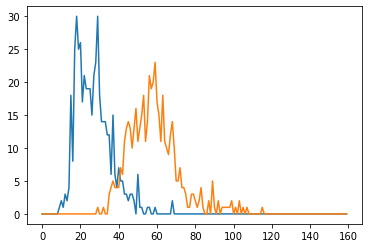

In [131]:
plt.plot(y)
plt.plot(w)

In [125]:
x = np.array(x) / sum(x)
y = np.array(y) / sum(y)
z = np.array(z) / sum(z)
w = np.array(w) / sum(w)

0.9999999999999999

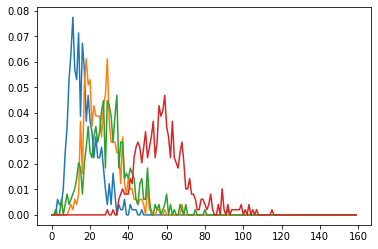

In [127]:
plt.plot(x)
plt.plot(y)
plt.plot(z)
plt.plot(w)

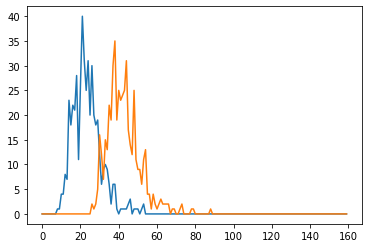

In [129]:
up = [0 for i in range(160)]
low = [0 for i in range(160)]

BLOCK = 10

assert( len(upper) == len(lower) )

for i in range(len(upper)):
    idx = round(upper[i] / BLOCK)
    idy = round(lower[i] / BLOCK)
    up[idx] += 1
    low[idy] += 1
    
plt.plot(up)
plt.plot(low)

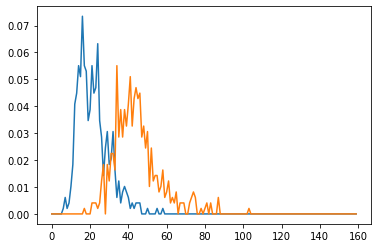

In [8]:
up = np.array([0 for i in range(160)])
low = np.array([0 for i in range(160)])

BLOCK = 5

assert( len(upper) == len(lower) )

for i in range(len(upper)):
    idx = round(h_mid[i] / BLOCK)
    idy = round(w_mid[i] / BLOCK)
    up[idx] += 1
    low[idy] += 1
    
plt.plot(up / up.sum())
plt.plot(low / low.sum())

21.80204081632653 541.5489795918368 66.21999583506869 8.137566948115923
0.80941910


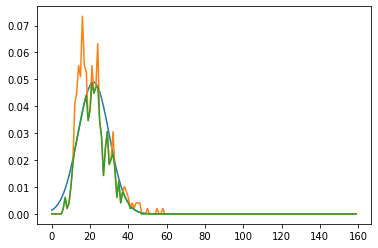

In [9]:
def gaussian(x, mean, var, pi = 1):
    return pi * (1 / np.sqrt(2*np.pi * var)) * np.exp(- (x-mean)**2 / (2*var))

def hist_intersection(hist1, hist2):
    intsc = np.array([0 for i in range(256)], dtype='float32')
    for i in range(255):
        intsc[i] += min(hist1[i], hist2[i])
    return intsc.sum()

def get_plot(up):
    sx = np.arange(0, 160, 1)
    inx = np.arange(0.0, 160, 1)

    EX = 0
    EX2 = 0
    for i in range(len(up)):
        EX += (up[i] * i)
        EX2 += (up[i] * (i**2))

    EX = EX / up.sum()
    EX2 = EX2 / up.sum()

    print(EX, EX2, EX2 - EX**2, np.sqrt(EX2 - EX**2))

    gau = gaussian(sx, mean=EX, var=EX2 - EX**2)

    plt.plot(gau)
    plt.plot(up / up.sum())

    for i in range(len(up)):
        inx[i] = min(up[i] / up.sum(), gau[i])
    plt.plot(inx)
    print(f'{inx.sum():.8f}')

get_plot(up = up)

44.220408163265304 2099.791836734694 144.3473386089131 12.014463725398363
0.80676518


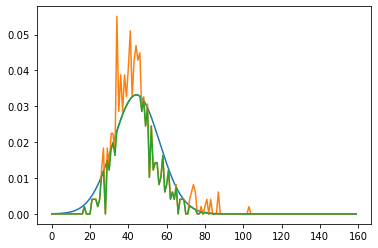

In [10]:
get_plot(up = low)

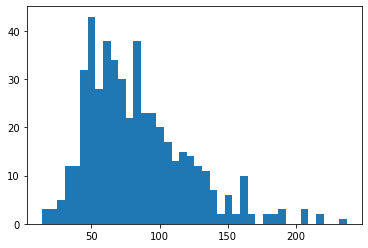

In [97]:
plt.hist(h_min, bins=40)
plt.show()

(array([ 2.,  2.,  4.,  5., 22., 29., 39., 42., 25., 31., 31., 20., 29.,
        40., 31., 19., 23., 16., 10., 19.,  7.,  8.,  7.,  6.,  2.,  6.,
         2.,  3.,  4.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         2.]),
 array([ 43. ,  50.4,  57.8,  65.2,  72.6,  80. ,  87.4,  94.8, 102.2,
        109.6, 117. , 124.4, 131.8, 139.2, 146.6, 154. , 161.4, 168.8,
        176.2, 183.6, 191. , 198.4, 205.8, 213.2, 220.6, 228. , 235.4,
        242.8, 250.2, 257.6, 265. , 272.4, 279.8, 287.2, 294.6, 302. ,
        309.4, 316.8, 324.2, 331.6, 339. ]),
 <BarContainer object of 40 artists>)

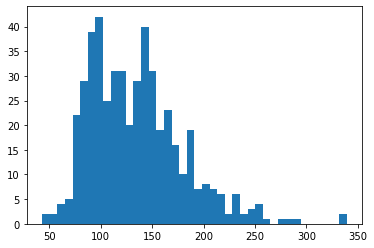

In [98]:
plt.hist(h_max, bins=40)

(array([ 4., 15., 31., 51., 62., 78., 84., 63., 36., 19., 24.,  4.,  8.,
         3.,  3.,  2.,  1.,  1.,  0.,  1.]),
 array([ 11. ,  33.4,  55.8,  78.2, 100.6, 123. , 145.4, 167.8, 190.2,
        212.6, 235. , 257.4, 279.8, 302.2, 324.6, 347. , 369.4, 391.8,
        414.2, 436.6, 459. ]),
 <BarContainer object of 20 artists>)

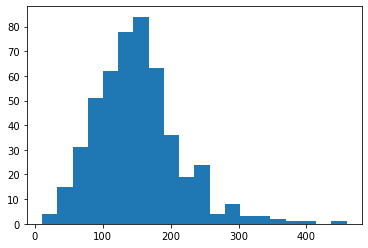

In [43]:
plt.hist(w_min, bins=20)

(array([ 4.,  9., 51., 81., 56., 51., 69., 50., 39., 29., 15., 13.,  8.,
         5.,  5.,  1.,  2.,  0.,  0.,  2.]),
 array([ 43. ,  57.8,  72.6,  87.4, 102.2, 117. , 131.8, 146.6, 161.4,
        176.2, 191. , 205.8, 220.6, 235.4, 250.2, 265. , 279.8, 294.6,
        309.4, 324.2, 339. ]),
 <BarContainer object of 20 artists>)

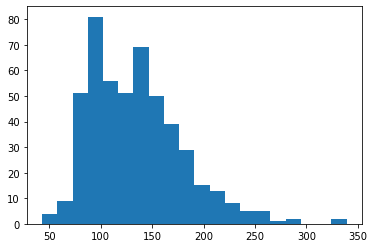

In [44]:
plt.hist(h_max, bins=20)

(array([ 1.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,  0.,  1.,  0.,  4.,  2.,
         0.,  3.,  2.,  1.,  3.,  1.,  5.,  4., 11.,  5.,  5.,  3.,  5.,
        10., 12., 10.,  7., 10., 15., 11., 11., 16., 11., 15., 12., 15.,
        16., 13., 21., 26., 20., 17., 19., 19., 28., 27., 17., 22., 22.,
        20., 23., 26., 25., 22., 16., 25., 28., 14., 25., 18., 19., 19.,
        27., 13., 12., 19., 11., 11.,  8., 18., 12., 13.,  9.,  9., 13.,
        10.,  5.,  6.,  6.,  3.,  4.,  4.,  4.,  3.,  3.,  4.,  2.,  1.,
         0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([-199.58908552, -198.13267865, -196.67627179, -195.21986492,
        -193.76345806, -192.30705119, -190.85064433, -189.39423746,
        -187.9378306 , -186.48142374, -185.02501687, -183.56861001,
        -182.11220314, -180.65579628, -179.19938941, -177.74298255,
        -176.28657568, -174.83016882, -173.37376196, -171.91735509,
        -170.46094823, -169.00454136, -167.5481345 , -166.09172763,
        -164.63532077, -16

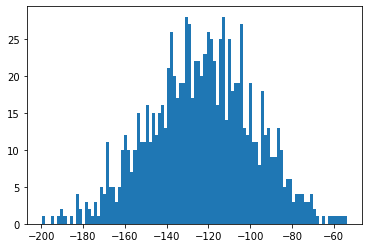

In [88]:
import numpy as np
import matplotlib.pyplot as plt

s = np.random.normal(loc=-122.5, scale=25, size=1000)
plt.hist(s, bins=100)

In [24]:
import sys
sys.path.append('/data1/sdi/CPNKDv4')
from utils import ext_transforms as et
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from datasets.pmpn import PMPN
from datasets.pgpn import PGPN

dataset len(dst) = 374
torch.Size([16, 3, 128, 128])
torch.Size([16, 128, 128])
4.695350646972656
-3.6953506469726562
(3, 128, 128)


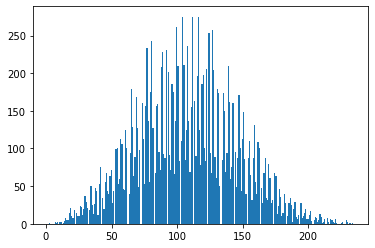

In [87]:
transform = et.ExtCompose([
                et.ExtRandomCrop(size=(256, 256), pad_if_needed=True),
                et.ExtScale(scale=0.5),
                et.ExtToTensor(is_binary=False, normalize=False),
                #et.ExtNormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                ])

dst = PGPN(root='/data1/sdi/datasets', datatype='pgmn', image_set='train',
            transform=transform, is_rgb=True, dver='splits/v5/3', mu=0, std=5)
train_loader = DataLoader(dst, batch_size=16,
                        shuffle=True, num_workers=2, drop_last=True)
print(f'dataset len(dst) = {len(dst)}')
for i, (ims, lbls) in enumerate(train_loader):
    print(ims.shape)
    print(lbls.shape)
    print(lbls.numpy().sum()/(lbls.shape[0] * lbls.shape[1] * lbls.shape[2]))
    print(1 - lbls.numpy().sum()/(lbls.shape[0] * lbls.shape[1] * lbls.shape[2]))
    print(ims[0,:].numpy().shape)
    #plt.hist(ims[0,:].numpy()[0,:].flatten(), bins=100)
    plt.hist(ims[0,:].numpy()[1,:].flatten(), bins=255)
    #plt.hist(ims[0,:].numpy()[2,:].flatten(), bins=100)
    if i >= 0:
        break